In [2]:
# importar e visualizar os dados

import pandas as pd

dados = pd.read_csv("Telco_Recent.csv")
dados = dados.drop(columns=['Unnamed: 0', 'gender', 'PhoneService', 'MultipleLines'])
display(dados)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Category
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,baixo
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,medio
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,baixo
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,medio
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,medio
7028,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,alto
7029,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,baixo
7030,1,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,baixo


In [3]:
# transformando os valores

mod = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2
}
mod2 = {
    'No': 0,
    'Yes': 1
}
dados['StreamingTV'] = dados['StreamingTV'].map(mod)
dados['StreamingMovies'] = dados['StreamingMovies'].map(mod)
dados['OnlineBackup'] = dados['OnlineBackup'].map(mod)
dados['DeviceProtection'] = dados['DeviceProtection'].map(mod)
dados['TechSupport'] = dados['TechSupport'].map(mod)
dados['OnlineSecurity'] = dados['OnlineSecurity'].map(mod)
dados['Partner'] = dados['Partner'].map(mod2)
dados['Dependents'] = dados['Dependents'].map(mod2)
dados['PaperlessBilling'] = dados['PaperlessBilling'].map(mod2)
dados['Contract'] = dados['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
dados['TotalCharges_Category'] = dados['TotalCharges_Category'].map({'baixo': 0, 'medio': 1, 'alto': 2})
dados = pd.get_dummies(dados, columns=['InternetService', 'PaymentMethod'], drop_first=True)

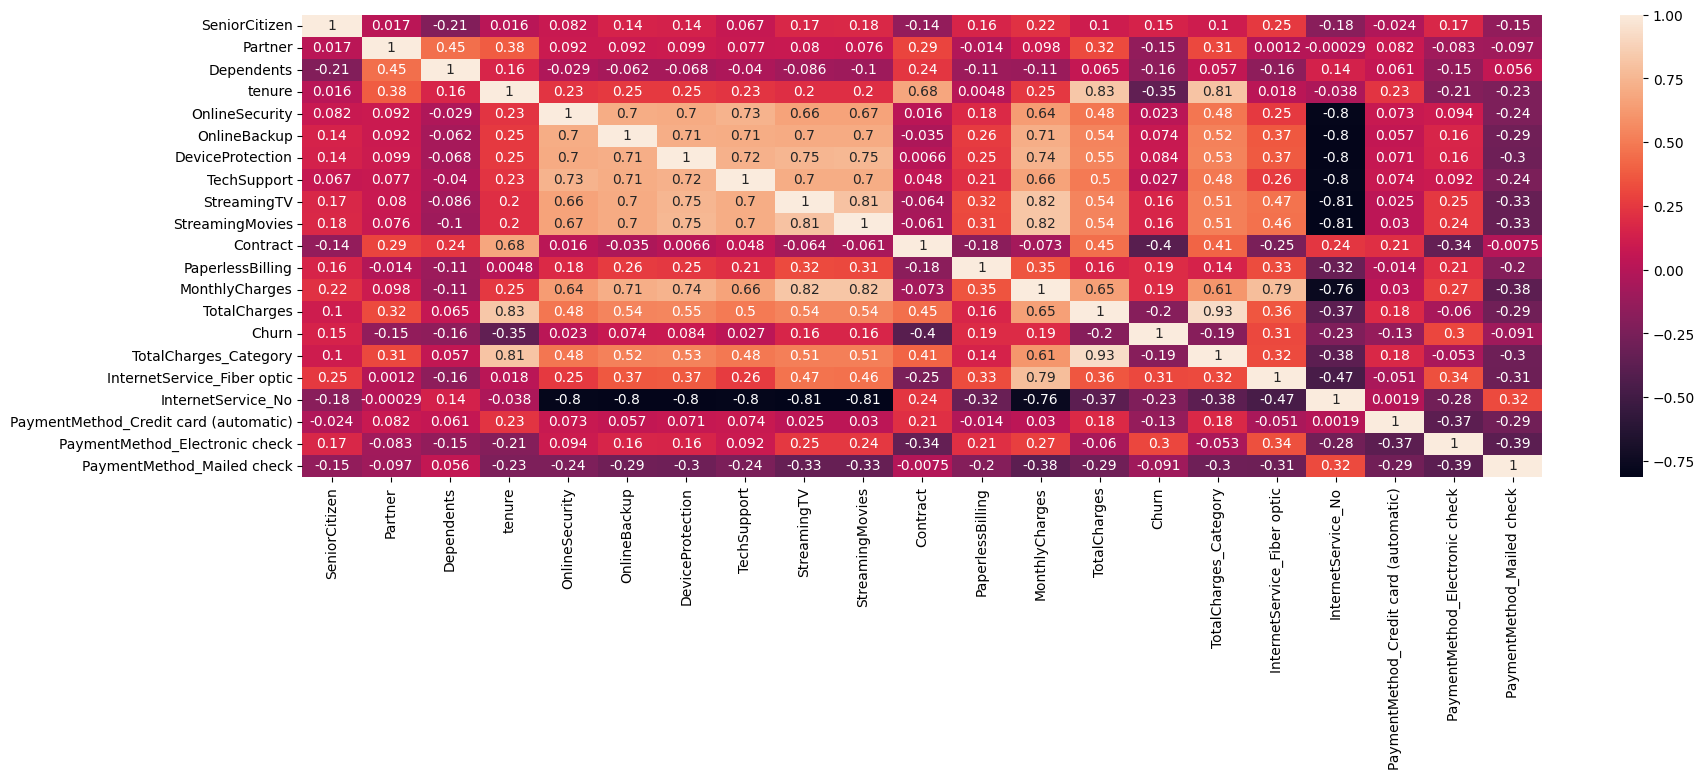

In [5]:
# visualizacao das correlacoes entre as variaveis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.heatmap(dados.corr(numeric_only=True), annot=True)
plt.show()

In [6]:
# separar os dados de teste e treino e treinar o modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

X = dados.drop(columns='Churn')
y = dados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
# random forest
forest = RandomForestClassifier()
forest.fit(X, y)
pred_forest = forest.predict(X_test)

# regressao logistica
Regression = LogisticRegression()
Regression.fit(X, y)
pred_regression = Regression.predict(X_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X, y)
pred_xgb = xgb.predict(X_test)

# Gradient Boosting
gradient = GradientBoostingClassifier()
gradient.fit(X, y)
pred_gradient = gradient.predict(X_test)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Avaliando os modelos para a escolha

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

print("Random Forest")
print("---------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_forest)}')
print(f'Acuracia: {accuracy_score(y_test, pred_forest)}')
print(f'Recall: {recall_score(y_test, pred_forest)}')
print(f'F1: {f1_score(y_test, pred_forest)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_forest)}')
print(f'{confusion_matrix(y_test, pred_forest)}')
print(f'Validacao Cruzada: {cross_val_score(forest, X, y, cv=5).mean()}')

Random Forest
---------------------------------------------
Precisao: 0.9923857868020305
Acuracia: 0.9964463397299218
Recall: 0.9949109414758269
F1: 0.9936467598475223
ROC AUC: 0.9959761807970852
[[1011    3]
 [   2  391]]
Validacao Cruzada: 0.7889637364892668


In [10]:
print("Regressao Linear")
print("--------------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_regression)}')
print(f'Acuracia: {accuracy_score(y_test, pred_regression)}')
print(f'Recall: {recall_score(y_test, pred_regression)}')
print(f'F1: {f1_score(y_test, pred_regression)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_regression)}')
print(f'{confusion_matrix(y_test, pred_regression)}')

Regressao Linear
--------------------------------------------------
Precisao: 0.6645962732919255
Acuracia: 0.7960199004975125
Recall: 0.544529262086514
F1: 0.5986013986013986
ROC AUC: 0.7190101931734345
[[906 108]
 [179 214]]


In [11]:
print("XGBoost")
print("--------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_xgb)}')
print(f'Acuracia: {accuracy_score(y_test, pred_xgb)}')
print(f'Recall: {recall_score(y_test, pred_xgb)}')
print(f'F1: {f1_score(y_test, pred_xgb)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_xgb)}')
print(f'{confusion_matrix(y_test, pred_xgb)}')
print(f'Validacao Cruzada: {cross_val_score(xgb, X, y, cv=5).mean()}')

XGBoost
--------------------------------------------
Precisao: 0.8623595505617978
Acuracia: 0.9040511727078892
Recall: 0.7811704834605598
F1: 0.8197596795727636
ROC AUC: 0.8664235060300827
[[965  49]
 [ 86 307]]
Validacao Cruzada: 0.7824228784951487


In [12]:
print("Gradient Boosting")
print("----------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_gradient)}')
print(f'Acuracia: {accuracy_score(y_test, pred_gradient)}')
print(f'Recall: {recall_score(y_test, pred_gradient)}')
print(f'F1: {f1_score(y_test, pred_gradient)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_gradient)}')
print(f'{confusion_matrix(y_test, pred_gradient)}')
print(f'Validacao Cruzada: {cross_val_score(gradient, X, y, cv=5).mean()}')

Gradient Boosting
----------------------------------------------
Precisao: 0.7133757961783439
Acuracia: 0.8159203980099502
Recall: 0.5699745547073791
F1: 0.6336633663366337
ROC AUC: 0.7406085791288375
[[924  90]
 [169 224]]
Validacao Cruzada: 0.801192574012684


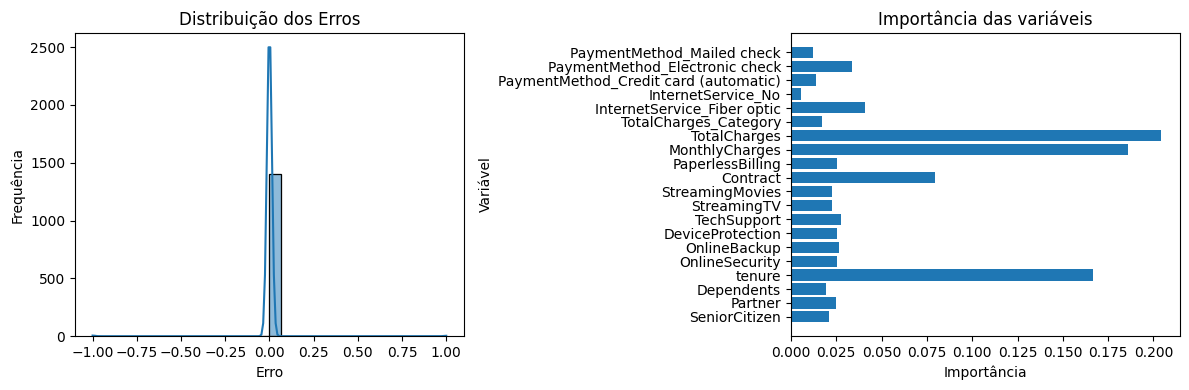

In [13]:
# visualizacoes do modelo escolhido (random forest)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
erros_random = y_test - pred_forest
sns.histplot(erros_random, bins=30, kde=True)
# bins = 30 -> é usado em histogramas para para controlar o número de divisões do eixo X
plt.title("Distribuição dos Erros")
plt.xlabel('Erro')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
importances = forest.feature_importances_ # obtem a importancia de cada variavel
plt.barh(X.columns, importances)
# X.columns -> é usado quando tens um dataframe X e queres acessar os nomes das colunas
plt.title("Importância das variáveis")
plt.xlabel("Importância")
plt.ylabel('Variável')

plt.tight_layout()
plt.show()

In [14]:
# salvando o melhor modelo

import pickle

with open("forest_treinado.pkl", "wb") as f:
    pickle.dump(forest, f)